In [1]:
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np 
import imutils
import argparse
import random
import pickle
import cv2
import os

Using TensorFlow backend.
C:\Users\Irka\Folder\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Irka\Folder\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Irka\Folder\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Irka\Folder\Anaco

In [2]:
print("[INFO] loading image...")
data = []
labels = []

[INFO] loading image...


In [3]:
imagePaths = sorted(list(paths.list_images("train")))
random.seed(42)
random.shuffle(imagePaths)

In [4]:
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring
    # aspect ratio), flatten the image into 32x32x3=3072 pixel image
    # into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32,32)).flatten()
    data.append(image)
    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [6]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [7]:
print(data.shape)

(524, 3072)


In [8]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, 
                                                    random_state=42)

In [9]:
print(trainX.shape)
print(trainY.shape)

(419, 3072)
(419,)


In [10]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [11]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [12]:
INIT_LR = 0.01
EPOCHS = 75

In [13]:
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the neural network
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS,
                batch_size=32)

[INFO] training network...
Train on 419 samples, validate on 105 samples
Epoch 1/75
419/419 [==============================] - 3s 8ms/step - loss: 1.1375 - acc: 0.3294 - val_loss: 1.1077 - val_acc: 0.3048
Epoch 2/75
419/419 [==============================] - 2s 4ms/step - loss: 1.1047 - acc: 0.3866 - val_loss: 1.1734 - val_acc: 0.3810
Epoch 3/75
419/419 [==============================] - 2s 4ms/step - loss: 1.1011 - acc: 0.3484 - val_loss: 1.1659 - val_acc: 0.3810
Epoch 4/75
419/419 [==============================] - 2s 5ms/step - loss: 1.0960 - acc: 0.3628 - val_loss: 1.1854 - val_acc: 0.3143
Epoch 5/75
419/419 [==============================] - 2s 5ms/step - loss: 1.1064 - acc: 0.3294 - val_loss: 1.1181 - val_acc: 0.3810
Epoch 6/75
419/419 [==============================] - 2s 5ms/step - loss: 1.0854 - acc: 0.3532 - val_loss: 1.4032 - val_acc: 0.3143
Epoch 7/75
419/419 [==============================] - 2s 6ms/step - loss: 1.0944 - acc: 0.4224 - val_loss: 1.1963 - val_acc: 0.3143
Epo

419/419 [==============================] - 3s 6ms/step - loss: 0.7963 - acc: 0.7041 - val_loss: 0.9150 - val_acc: 0.5429
Epoch 63/75
419/419 [==============================] - 2s 5ms/step - loss: 0.7564 - acc: 0.6945 - val_loss: 0.8933 - val_acc: 0.5429
Epoch 64/75
419/419 [==============================] - 2s 4ms/step - loss: 0.7639 - acc: 0.6945 - val_loss: 0.8819 - val_acc: 0.5524
Epoch 65/75
419/419 [==============================] - 2s 4ms/step - loss: 0.7472 - acc: 0.7064 - val_loss: 1.0329 - val_acc: 0.4190
Epoch 66/75
419/419 [==============================] - 2s 4ms/step - loss: 0.7557 - acc: 0.7088 - val_loss: 0.8988 - val_acc: 0.5714
Epoch 67/75
419/419 [==============================] - 2s 5ms/step - loss: 0.7419 - acc: 0.7112 - val_loss: 0.8305 - val_acc: 0.6286
Epoch 68/75
419/419 [==============================] - 2s 5ms/step - loss: 0.7427 - acc: 0.7112 - val_loss: 1.0240 - val_acc: 0.5143
Epoch 69/75
419/419 [==============================] - 2s 5ms/step - loss: 0.7367

In [14]:
print("[INFO] evaluating network...")
prediction = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), prediction.argmax(axis=1),
                            target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

         car       0.53      0.45      0.49        40
         cat       0.53      0.81      0.64        32
        ship       0.82      0.55      0.65        33

    accuracy                           0.59       105
   macro avg       0.63      0.60      0.59       105
weighted avg       0.62      0.59      0.59       105



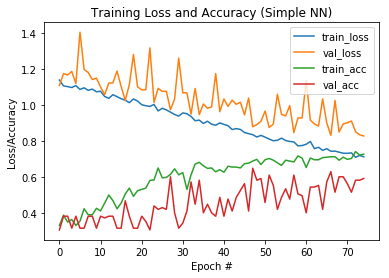

In [16]:
N = np.arange(0, EPOCHS)
#plt.style.use("gglot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["plot"])

In [53]:
im = cv2.imread("Sea.jpg")
im = np.array([cv2.resize(im, (32,32)).flatten()], dtype="float") / 255.0
print(im.shape)
im

(1, 3072)


array([[0.90980392, 0.69019608, 0.57647059, ..., 0.39215686, 0.23921569,
        0.11372549]])

In [54]:
testX

array([[0.04705882, 0.05490196, 0.05882353, ..., 0.38823529, 0.39607843,
        0.41176471],
       [0.05490196, 0.37647059, 0.26666667, ..., 0.25490196, 0.42745098,
        0.39215686],
       [0.71372549, 0.52156863, 0.36470588, ..., 0.34509804, 0.2627451 ,
        0.14117647],
       ...,
       [0.35294118, 0.23137255, 0.02352941, ..., 0.61568627, 0.51372549,
        0.21176471],
       [0.89019608, 0.81960784, 0.77647059, ..., 0.71372549, 0.7372549 ,
        0.75686275],
       [0.19607843, 0.47843137, 0.59607843, ..., 0.28627451, 0.38431373,
        0.45098039]])

Text(0.5,1,"['ship']")

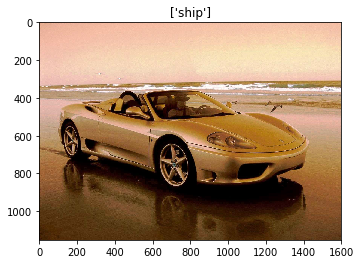

In [59]:
pr = model.predict(im, batch_size=32)
plt.imshow(cv2.imread("Sea.jpg"))
plt.title(lb.classes_[pr.argmax(axis=1)])


In [56]:
pr

array([[0.23597927, 0.02124418, 0.7427766 ]], dtype=float32)

In [57]:
lb.classes_

array(['car', 'cat', 'ship'], dtype='<U4')